# Take a look at the fractions

In [11]:
%cd ../../

/Users/jesteves/Documents/GitHub/galaxyFormation


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at
import seaborn as sns

In [13]:
# from file_loc import FileLocs

# fl = FileLocs()
# file_base = fl.data_loc+'tmp/{type}_{prop}.npy'

In [14]:
label1 = ['Cluster', 'Infall', 'Interlopers']
label2 = ['Cluster+Infall', 'Cluster+Interlopers', 'Infall+Interlopers']


In [15]:
labels_mpr = ['sf', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

labels = labels_mpr+labels_bpt

In [16]:
columnsA = ['fo_%s'%li for li in labels]

In [22]:
import sys
sys.path.append('./scripts')
# from utils import compute_fraction2, quenching_fraction_excess, chunks, check_non_valid_number
from file_loc import FileLocs

fl = FileLocs(dataset='sdss')
cat = fl.load_catalogs('cluster/frac_vl')
# gal0 = fl.load_catalogs('galaxy/main')


Loading Catalog: ./data/catalogs/SDSS/groupCatalog_Yang_deCarvalho2017_frac_vl.csv


In [23]:
cat

Yang,RA,DEC,redshift,N200,logM200c,logM200m,R200c,R200m,thetaR200,thetaR200m,vcirc_c,vcirc_m,fo_quenching,fo_quenching_err,fi_quenching,fi_quenching_err,fn_quenching,fn_quenching_err,ff_quenching,ff_quenching_err,qf1_quenching,qf1_quenching_err,qf2_quenching,qf2_quenching_err,qf3_quenching,qf3_quenching_err,qf4_quenching,qf4_quenching_err,fo_sf,fo_sf_err,fi_sf,fi_sf_err,fn_sf,fn_sf_err,ff_sf,ff_sf_err,qf1_sf,qf1_sf_err,qf2_sf,qf2_sf_err,qf3_sf,qf3_sf_err,qf4_sf,qf4_sf_err,fo_elliptical,fo_elliptical_err,fi_elliptical,fi_elliptical_err,fn_elliptical,fn_elliptical_err,ff_elliptical,ff_elliptical_err,qf1_elliptical,qf1_elliptical_err,qf2_elliptical,qf2_elliptical_err,qf3_elliptical,qf3_elliptical_err,qf4_elliptical,qf4_elliptical_err,fo_spiral,fo_spiral_err,fi_spiral,fi_spiral_err,fn_spiral,fn_spiral_err,ff_spiral,ff_spiral_err,qf1_spiral,qf1_spiral_err,qf2_spiral,qf2_spiral_err,qf3_spiral,qf3_spiral_err,qf4_spiral,qf4_spiral_err,fo_bulge,fo_bulge_err,fi_bulge,fi_bulge_err,fn_bulge,fn_bulge_err,ff_bulge,ff_bulge_err,qf1_bulge,qf1_bulge_err,qf2_bulge,qf2_bulge_err,qf3_bulge,qf3_bulge_err,qf4_bulge,qf4_bulge_err,fo_bt,fo_bt_err,fi_bt,fi_bt_err,fn_bt,fn_bt_err,ff_bt,ff_bt_err,qf1_bt,qf1_bt_err,qf2_bt,qf2_bt_err,qf3_bt,qf3_bt_err,qf4_bt,qf4_bt_err
int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,240.5602,16.1113,0.035999998450279236,525,15.444902420043945,15.61043080796355,2.8714284896850586,3.880159897239745,0.7795811316295294,1.0534475724189225,2041.7840576171875,1887.7175813096123,0.6205826581623858,0.05888422660381921,0.47759370944346896,0.03669929726474164,0.4474494873698678,0.03198662580358721,0.41807198590485783,0.043188726188012054,0.27371214953515877,0.1342015378013047,0.3133345582622061,0.12262504002698021,0.054554690267347924,0.08816159158914672,0.10228365381440399,0.09768790557296979,0.37941734183761416,0.04247858022871834,0.5224062905565311,0.03896013171185548,0.5525505126301322,0.03681320053651648,0.5819280140951423,0.05381752408057398,-0.2993945395251108,0.12313395346114898,-0.38693344316965067,0.1295954461965847,-0.06736899454459203,0.11992120944719839,-0.14237194919861665,0.1599722934414096,0.5268057231511809,0.05265998071601047,0.39012520039697685,0.03217213578049432,0.3847332585583166,0.029010662113651556,0.3189969796123836,0.0363840389739554,0.22411242904801362,0.10187296729715142,0.23091198503589244,0.09832216656314897,0.008763584109919462,0.07041049500852578,0.10444626331335236,0.07153622140390208,0.47319427684881915,0.04902451624941869,0.6098747996030232,0.04328798076724878,0.6152667414416835,0.03962310993852274,0.6810030203876164,0.06001426464272451,-0.350350407036313,0.1720886573058934,-0.36927523532860745,0.16819647101984406,-0.014014753647410566,0.15253910805238055,-0.22297459013882154,0.23573036240617523,0.40392672847969796,0.04421677674595709,0.3189838096644444,0.028337072728080576,0.3192396145362985,0.025793777220071295,0.2875105515501189,0.03412699228883263,0.12472966138059043,0.07729117546861285,0.12440076677745376,0.07534328678322784,-0.00037576345115891696,0.05628781814509051,0.04417364802075301,0.06229385164879057,0.4567143595931736,0.047893116421195835,0.41440186273761354,0.03344630853339821,0

In [24]:
df = cat.to_pandas()

In [27]:
def get_columns(mytpe):
    columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n','f')]
    columnsA += ['qf1_%s'%(mytpe),'qf2_%s'%(mytpe),'qf3_%s'%(mytpe)]
    return columnsA

In [28]:
mytpe = 'elliptical'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_elliptical,fi_elliptical,fn_elliptical,ff_elliptical,qf1_elliptical,qf2_elliptical,qf3_elliptical
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.629563,0.498241,0.392099,0.366430,0.264485,0.392441,0.175457
std,0.136194,0.126971,0.085350,0.118095,0.191101,0.201037,0.169520
min,0.220367,0.171263,0.130142,0.000000,-0.497276,-0.210736,-0.449907
16%,0.482998,0.365679,0.300960,0.252541,0.092877,0.169657,0.014695
50%,0.647864,0.503177,0.400165,0.374189,0.266796,0.401058,0.167736
84%,0.775271,0.622623,0.483964,0.475798,0.451009,0.599263,0.339108
max,0.937129,0.768951,0.617875,0.741228,0.819058,0.890079,0.648437


In [29]:
mytpe = 'quenching'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_quenching,fi_quenching,fn_quenching,ff_quenching,qf1_quenching,qf2_quenching,qf3_quenching
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.697664,0.547613,0.411605,0.380278,0.347383,0.490287,0.233467
std,0.144462,0.135637,0.107776,0.138736,0.229646,0.224761,0.178626
min,0.252115,0.199690,0.166635,0.000000,-0.409917,-0.284085,-0.347804
16%,0.544081,0.410377,0.295564,0.239827,0.144356,0.263579,0.060771
50%,0.720616,0.554358,0.419874,0.397873,0.357422,0.506977,0.238628
84%,0.842501,0.688795,0.514944,0.504112,0.561599,0.703795,0.411441
max,1.000000,0.903800,0.778001,0.847458,1.000000,1.000000,0.693806


In [30]:
mytpe = 'spiral'
df[get_columns(mytpe)].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral,ff_spiral,qf1_spiral,qf2_spiral,qf3_spiral
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.370437,0.501759,0.607901,0.633570,-0.300169,-0.655425,-0.293114
std,0.136194,0.126971,0.085350,0.118095,0.256509,0.425436,0.312364
min,0.062871,0.231049,0.382125,0.258772,-1.320012,-2.429654,-1.963176
16%,0.224729,0.377377,0.516036,0.524202,-0.497044,-1.045741,-0.581997
50%,0.352136,0.496823,0.599835,0.625811,-0.259134,-0.578882,-0.244857
84%,0.517002,0.634321,0.699040,0.747459,-0.075779,-0.241786,-0.028804
max,0.779633,0.828737,0.869858,1.000000,0.304560,0.272777,0.582361


In [32]:
mytpe = 'spiral'
columnsA = ['f%s_%s'%(li,mytpe) for li in ('o','i','n','f')]
df[columnsA].describe(percentiles=[.16,.50,.84])

,fo_spiral,fi_spiral,fn_spiral,ff_spiral
count,319.000000,319.000000,319.000000,319.000000
mean,0.370437,0.501759,0.607901,0.633570
std,0.136194,0.126971,0.085350,0.118095
min,0.062871,0.231049,0.382125,0.258772
16%,0.224729,0.377377,0.516036,0.524202
50%,0.352136,0.496823,0.599835,0.625811
84%,0.517002,0.634321,0.699040,0.747459
max,0.779633,0.828737,0.869858,1.000000


In [33]:
columns=['fo_quenching','fo_elliptical','fi_quenching','fi_elliptical','ff_quenching', 'ff_elliptical']
df[columns].describe(percentiles=[.16,.50,.84])

,fo_quenching,fo_elliptical,fi_quenching,fi_elliptical,ff_quenching,ff_elliptical
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.697664,0.629563,0.547613,0.498241,0.380278,0.366430
std,0.144462,0.136194,0.135637,0.126971,0.138736,0.118095
min,0.252115,0.220367,0.199690,0.171263,0.000000,0.000000
16%,0.544081,0.482998,0.410377,0.365679,0.239827,0.252541
50%,0.720616,0.647864,0.554358,0.503177,0.397873,0.374189
84%,0.842501,0.775271,0.688795,0.622623,0.504112,0.475798
max,1.000000,0.937129,0.903800,0.768951,0.847458,0.741228


In [35]:
import pandas as pd

def plot_enviroment(cat,mytpe):
    orbital = np.array(cat['fo_%s'%(mytpe)])
    infall = np.array(cat['fi_%s'%(mytpe)])
    interloper = np.array(cat['ff_%s'%(mytpe)])
    
    x1label = np.full((orbital.size),'cluster')
    x2label = np.full((orbital.size),'infall')
    x3label = np.full((orbital.size),'interloper')
    
    y = np.hstack([orbital,infall,interloper])
    x = np.hstack([x1label,x2label,x3label])
    
    res = pd.DataFrame({'fraction':y,mytpe:x})
    
    plt.clf()
#     g = sns.catplot(x="category", y="fraction", kind="violin", inner=None, data=res)
    g = sns.catplot(x=mytpe, y="fraction", kind="box", data=res,ci=86.5,estimator=np.median)
    #sns.swarmplot(x="category", y="fraction", color="k", size=3, data=res, ax=g.ax)
    plt.title(mytpe,fontsize=18)
    
    return res

<Figure size 432x288 with 0 Axes>

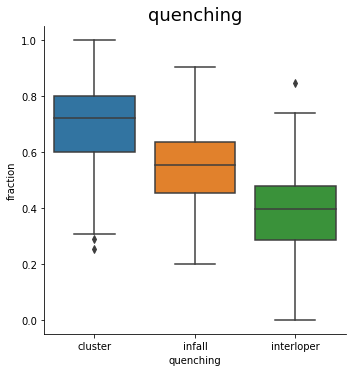

In [36]:
df = plot_enviroment(cat,'quenching')

<Figure size 432x288 with 0 Axes>

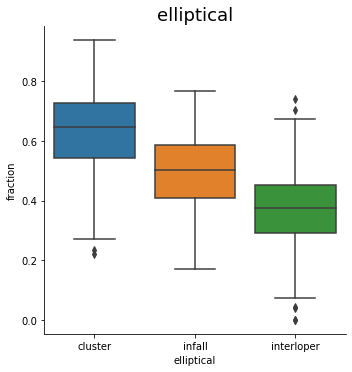

In [37]:
df = plot_enviroment(cat,'elliptical')

<Figure size 432x288 with 0 Axes>

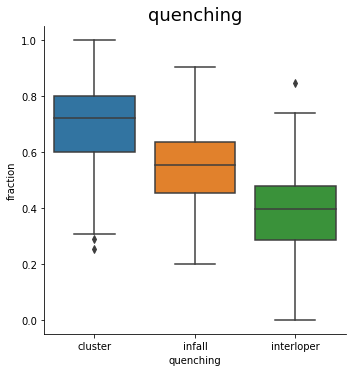

In [38]:
df = plot_enviroment(cat,'quenching')

In [39]:
df = plot_enviroment(cat,'spiral_quenching')

KeyError: 'fo_spiral_quenching'

<Figure size 432x288 with 0 Axes>

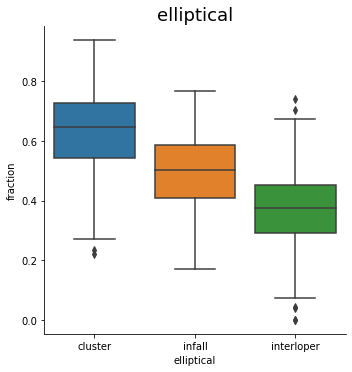

In [40]:
df = plot_enviroment(cat,'elliptical')

In [41]:
mytype='quenching'

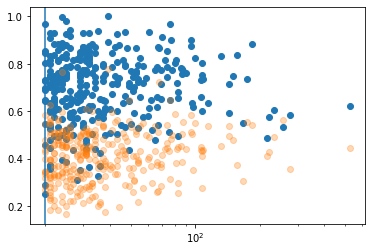

In [42]:
plt.scatter(cat['N200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
plt.axvline(20)
plt.xscale('log')

In [43]:
plt.scatter(cat['logM200'],cat['fo_%s'%(mytype)])
plt.scatter(cat['logM200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

KeyError: 'logM200'

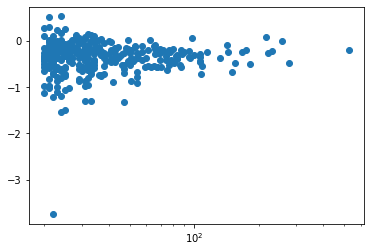

In [344]:
plt.scatter(cat['N200'],cat['qf2_%s'%(mytype)])
plt.xscale('log')

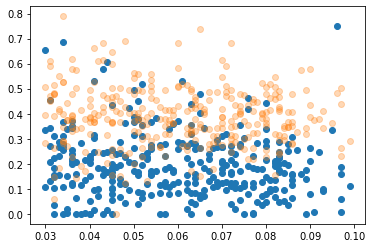

In [345]:
plt.scatter(cat['z'],cat['fo_%s'%(mytype)])
plt.scatter(cat['z'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

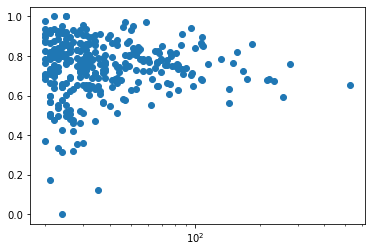

In [333]:
plt.scatter(cat['N200'],cat['fo_elliptical'])
plt.xscale('log')

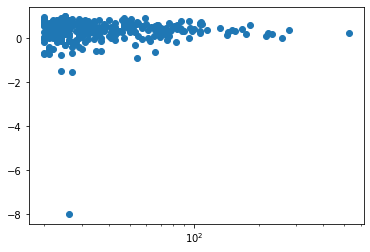

In [334]:
plt.scatter(cat['N200'],cat['qf1_elliptical'])
plt.xscale('log')

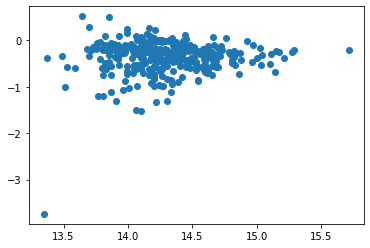

In [335]:
plt.scatter(cat['logM200'],cat['qf2_sf'])

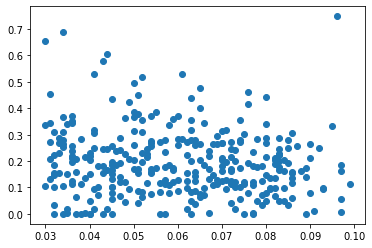

In [336]:
plt.scatter(cat['z'],cat['fo_sf'])

In [337]:
labels_mpr = ['quenching', 'sf', 'elliptical', 'spiral', 's0', 'bulge', 'disk', 'bar', 'merger']
labels_bpt = ['lsf', 'liners', 'agn', 'compos', 'unclas']

In [338]:
mytype1='quenching'
mytype2='unclas'

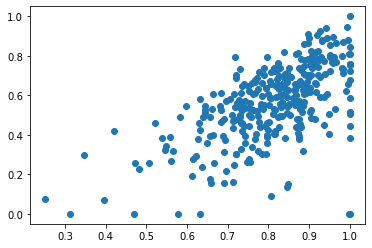

In [339]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [340]:
mytype1='elliptical'
mytype2='quenching'
mytype3='unclas'

(-0.02, 1.02)

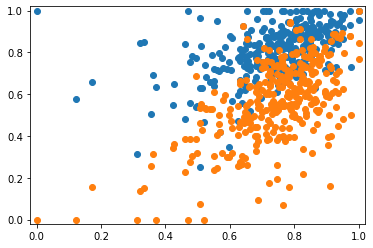

In [341]:
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype2)])
plt.scatter(cat['fo_%s'%(mytype1)],cat['fo_%s'%(mytype3)])
plt.xlim(-0.02,1.02)
plt.ylim(-0.02,1.02)
# plt.scatter(cat['N200'],cat['fn_%s'%(mytype)],alpha=0.3)
# plt.xscale('log')

In [11]:
cat = at.read('../data/groupCatalog_Yang_deCarvalho2017_smass.csv')

In [21]:
halo_mass = cat['logM200']
n200 = cat['N200']

In [153]:
smasso = cat['smasso']
smassi = cat['smassi']
sfro = cat['sfro']
sfri = cat['sfri']

ssfro = sfro-smasso
ssfri = sfri-smassi

In [154]:
fstellar = smasso-halo_mass

In [155]:
OIstelar = smasso-smassi

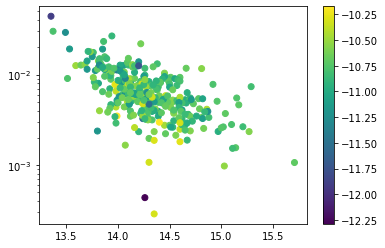

In [156]:
plt.scatter(halo_mass,10**fstellar,c=ssfro)
plt.yscale('log')
plt.colorbar()

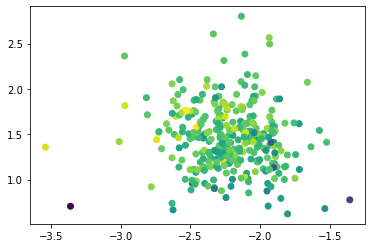

In [157]:
# plt.plot([11.,13.5],[11.,13.5],'k--')
plt.scatter(fstellar,sfri,c=ssfro)

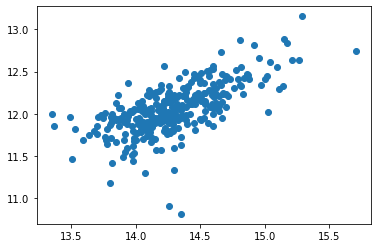

In [158]:
plt.scatter(halo_mass,smasso)

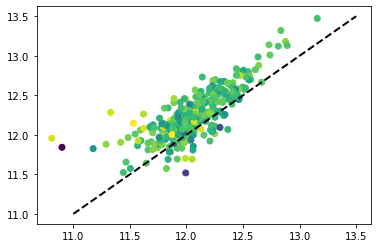

In [159]:
plt.plot([11.,13.5],[11.,13.5],'k--',lw=2)
plt.scatter(smasso,smassi,c=ssfro)

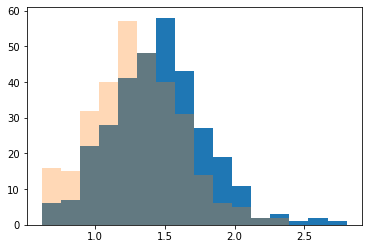

In [176]:
a = plt.hist(sfri,bins=16)
a = plt.hist(sfro,bins=a[1],alpha=0.3)

In [178]:
a[1]

array([0.62052656, 0.75684003, 0.89315349, 1.02946696, 1.16578043,
       1.30209389, 1.43840736, 1.57472083, 1.71103429, 1.84734776,
       1.98366123, 2.11997469, 2.25628816, 2.39260163, 2.52891509,
       2.66522856, 2.80154203])

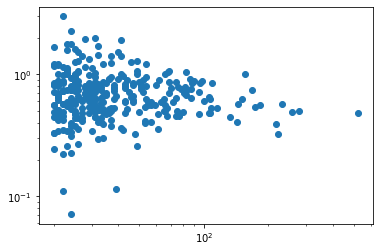

In [161]:
plt.scatter(n200,10**OIstelar)
plt.yscale('log')
plt.xscale('log')

In [162]:

from utils import gaussian_kde

In [163]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [173]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.2)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [179]:
# grid
xmin, xmax = 11., 13.0
# ymin, ymax = -10.0, -11.75
ymin, ymax = 0.4, 2.5
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

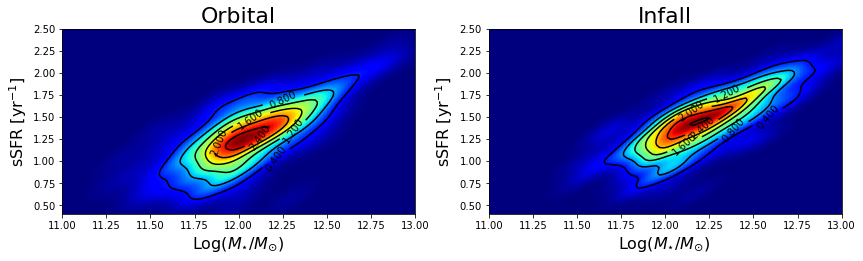

In [180]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
sSFRmass(smasso,sfro,np.ones_like(smasso),ax=axis[0],title='Orbital')
sSFRmass(smassi,sfri,np.ones_like(smasso),ax=axis[1],title='Infall')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

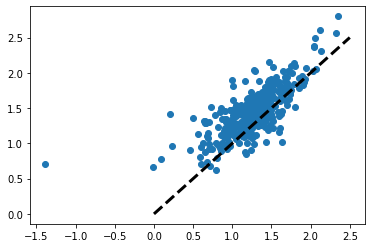

In [183]:
plt.scatter(sfro,sfri)
plt.plot([0.,2.5],[0.,2.5],'k--',lw=3)

In [224]:
# fq = np.array(cat0['fo_spiral'])
fq = np.array(cat['smasso_sf'])

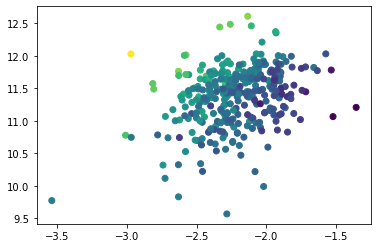

In [225]:
plt.scatter(fstellar,fq,c=halo_mass)
# plt.ylim(11)